In [1]:
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader, TensorDataset
import lightning as lit

c:\Users\tchio\anaconda3\envs\atom\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [63]:
class CustomDataset(TensorDataset):
    def __init__(self, data: torch.Tensor, targets: torch.Tensor):
        super().__init__(data, targets)

        self.data = data
        self.targets = targets

    def __getitem__(self, index):
        x = self.data[index]
        y = self.targets[index]
        return x, y

    def __len__(self):
        return len(self.data)

In [64]:
model = nn.Linear(1, 1)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
x_train = torch.randn((100, 1))
y_train = torch.randn((100, 1))
train_dataset = CustomDataset(x_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [65]:
from lightning.fabric.loggers import TensorBoardLogger

logger = TensorBoardLogger(root_dir="./logs", name="linear-reg", prefix="intro")
fabric = lit.Fabric(loggers=[logger])

In [66]:
model, optimizer = fabric.setup(model, optimizer)
train_loader = fabric.setup_dataloaders(train_loader)

In [67]:
import torchmetrics

n_epochs = 50
criterion = torchmetrics.MeanSquaredError()

for epoch in range(n_epochs):
    for batch in train_loader:
        x, y = batch
        optimizer.zero_grad()
        y_hat = model(x)
        loss = criterion(y_hat, y)
        fabric.backward(loss)
        optimizer.step()

    fabric.log("mse", criterion.compute(), step=epoch)
    criterion.reset()

Missing logger folder: ./logs\linear-reg


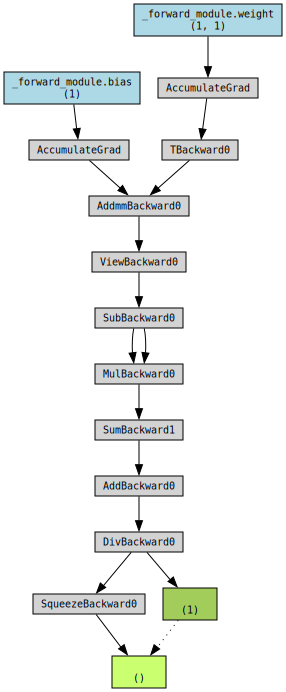

In [68]:
from torchviz import make_dot

make_dot(loss, params=dict(model.named_parameters()))

In [2]:
%load_ext tensorboard